<a href="https://colab.research.google.com/github/Chanita-Su/KKU_Data_Mining/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
x, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [3]:
x.shape

(300, 2)

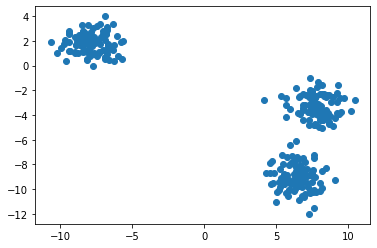

In [5]:
from matplotlib import pyplot as plt
plt.scatter(x[:,0],x[:,1]) 

##import

In [6]:
from sklearn.cluster import KMeans

##Define

In [11]:
KMclust = KMeans(n_clusters=5)

##Train

In [12]:
KMclust.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Predict

In [13]:
label = KMclust.predict(x)

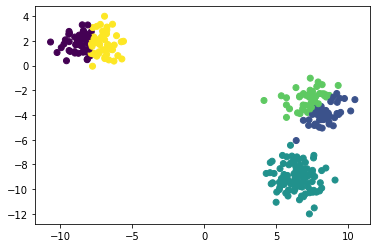

In [14]:
plt.scatter(x[:, 0],x[:, 1], c=label)

##Color quantization 

In [15]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/DWDM_material'

Mounted at /content/drive


In [18]:
import cv2
import os

In [19]:
img = cv2.imread(os.path.join(path,'baboon.jpg'))

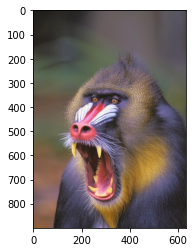

In [21]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [22]:
RGB_img.shape

(900, 632, 3)

##count unique color

In [23]:
import numpy as np

In [31]:
np.unique(RGB_img).shape

(256,)

In [32]:
#Define 
myQuantize = KMeans(n_clusters=8)

In [36]:
img_row = np.reshape(RGB_img,(900*632,3))
img_row

array([[30, 29, 24],
       [30, 29, 24],
       [30, 29, 24],
       ...,
       [36, 32, 29],
       [35, 31, 28],
       [42, 38, 35]], dtype=uint8)

In [39]:
#train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
#Predict
res = myQuantize.predict(img_row)

In [41]:
res

array([6, 6, 6, ..., 6, 6, 6], dtype=int32)

## get cluster centers 

In [48]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[ 72.32131653,  68.60462066,  76.44276107],
       [129.8928174 , 110.62694975, 122.87016523],
       [ 98.55396084,  94.07954623,  90.52354611],
       [180.96402028, 127.04135381,  82.27983382],
       [134.9998562 ,  95.56071451,  67.61168275],
       [229.40221298, 213.88112351, 225.08066957],
       [ 47.56020558,  42.97306276,  43.10378903],
       [197.3867416 , 155.52968613, 153.519058  ]])

In [49]:
Clus_cen.shape

(8, 3)

### Map color name back to image

In [50]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [51]:
new_img_ = new_img/255

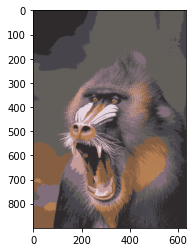

In [52]:
plt.imshow(new_img_)